In [178]:
from tensorflow.keras import backend as K
from tensorflow.keras import constraints, initializers, regularizers
from tensorflow.keras.layers import Dense, Layer
from tensorflow import keras

from spektral.layers.pooling.global_pool import GlobalPool, GlobalAvgPool, GlobalSumPool

import spektral as spktrl

from spektral.datasets import Citation, TUDataset
from spektral.data import SingleLoader
from spektral.data import Dataset, Graph

In [198]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def geometric_avg(x):
    return np.exp(np.mean(np.log(x)))

def harmonic_avg(x):
    ss = np.sum([1/i for i in x])
    return len(x) / ss

def p_average(a, p, weights=None) :
    if p == 0:
        return np.exp(np.average([np.log(aa) for aa in a] , weights=weights))
    return (np.average([aa**p for aa in a], weights=weights))**(1/p)

def lehmer(x, p):
    return np.sum(x**p) / np.sum(x**(p-1))

In [225]:
arrays = np.array([
#     [1, 2, 3, 5, 8, 1, 2],
    [13, 23, 9, 19, 15, 23],
#     [1, 2, 5, 7, 99, 203],
])

p_vals = np.arange(-10., 10.001, .001)

In [226]:
p = 5.
const = 10.01

lehmer(arrays[0] + const, p) - const, lehmer(arrays[0], p), np.mean(arrays[0])

(20.27303932445284, 21.31937093135675, 17.0)

In [253]:
p = 2.
consts = np.arange(0, 10.005, .005)

lehmer_raw_res = []
lehmer_const_res = []

for const in consts:
    lehmer_raw_res.append(lehmer(arrays[0], p))
    lehmer_const_res.append(lehmer(arrays[0] + const, p) - const)

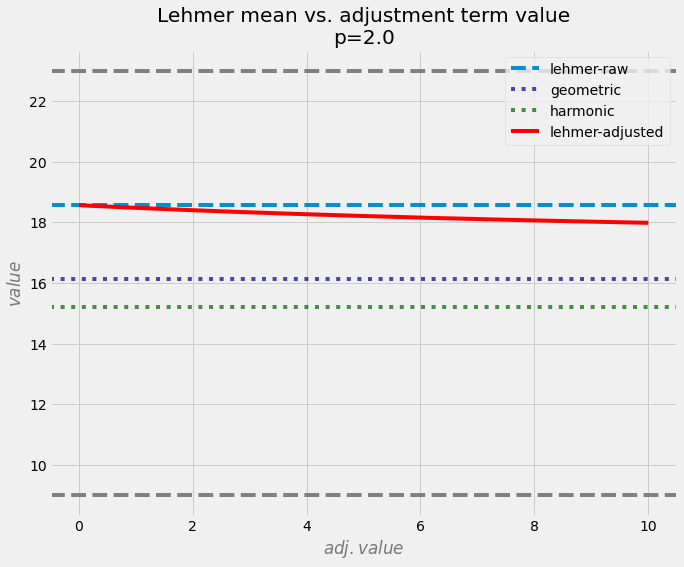

In [257]:

plt.figure(figsize=(10, 8))

plt.axhline(lehmer_raw_res[0], ls='--', label='lehmer-raw')
plt.axhline(arrays[0].min(), ls='--', color='gray')
plt.axhline(arrays[0].max(), ls='--', color='gray')
plt.axhline(geometric_avg(arrays[0]), ls='dotted', color='darkblue', alpha=.7, label='geometric')
plt.axhline(harmonic_avg(arrays[0]), ls='dotted', color='darkgreen', alpha=.7, label='harmonic')
plt.plot(consts, lehmer_const_res, color='red', label='lehmer-adjusted')

plt.title(f'Lehmer mean vs. adjustment term value\np={p}')
plt.xlabel('$adj. value$', alpha=.5)
plt.ylabel('$value$', alpha=.5)
plt.legend()

plt.show()

In [203]:
results_p = []
results_lehmer = []

for array in arrays:
    
    p_avgs = []
    lehmer_avgs = []

    for p in p_vals:
        p_avgs.append(p_average(array, p))
        lehmer_avgs.append(lehmer(array, p))
        
    results_p.append(p_avgs)
    results_lehmer.append(lehmer_avgs)

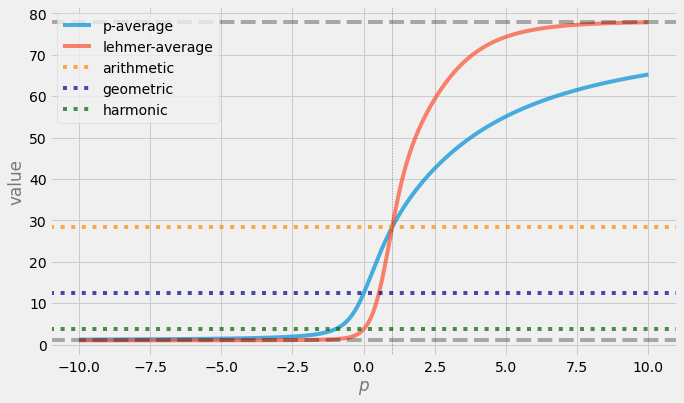

In [226]:
plt.figure(figsize=(10, 6))

for array, res_p, res_leh in zip(arrays, results_p, results_lehmer):
    plt.plot(p_vals, res_p, label=f'p-average', alpha=.7)
    plt.plot(p_vals, res_leh, label=f'lehmer-average', alpha=.7)
    
plt.axhline(max(arrays[0]), ls='--', color='black', alpha=.3)
plt.axhline(min(arrays[0]), ls='--', color='black', alpha=.3)
plt.axhline(np.mean(arrays[0]), ls='dotted', color='darkorange', alpha=.7, label='arithmetic')
plt.axhline(geometric_avg(arrays[0]), ls='dotted', color='darkblue', alpha=.7, label='geometric')
plt.axhline(harmonic_avg(arrays[0]), ls='dotted', color='darkgreen', alpha=.7, label='harmonic')

plt.axvline(1, color='black', lw=.5, ls='--', alpha=.5)

plt.legend()

plt.xlabel('$p$', alpha=.5)
plt.ylabel('value', alpha=.5)

plt.show()